In [1]:
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

###
if '../' not in sys.path:
    sys.path = ['../'] + sys.path
from lib.train import train
from lib.models import MLP
from lib.eval import get_output, test, plot_log, shap_net_x, shap_ccm_c, bootstrap

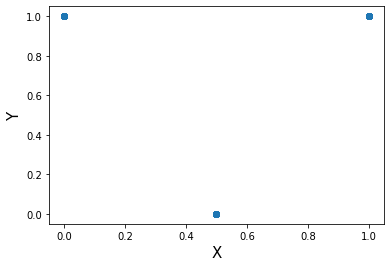

In [2]:
n = 10000
bs = 100
wd = 0

#X = torch.randn(n, 1)
#Y = X

XY = [[0, 1] for _ in range(n)] + [[1, 1] for _ in range(n)] + [[0.5, 0] for _ in range(n//10)]

X = torch.tensor(list(map(lambda xy: xy[0], XY))).unsqueeze(1).float()
Y = torch.tensor(list(map(lambda xy: xy[1], XY))).unsqueeze(1).float()

plt.scatter(X.numpy(), Y.numpy(), label='Y')
plt.ylabel('Y', fontsize=15)
plt.xlabel('X', fontsize=15)

# dataset
loader_xy = DataLoader(TensorDataset(X, Y), batch_size=bs, shuffle=False) # regular dataset

train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:05<00:00, 36.91it/s]


epoch   2: loss 7.604e-02


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:05<00:00, 37.87it/s]


epoch   5: loss 5.075e-02


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:04<00:00, 46.38it/s]


epoch   8: loss 3.902e-02


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:05<00:00, 40.65it/s]


epoch  11: loss 2.089e-02


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:02<00:00, 79.28it/s]


epoch  14: loss 6.297e-04


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:02<00:00, 99.04it/s]


epoch  17: loss 4.825e-05


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:04<00:00, 43.19it/s]


epoch  20: loss 5.293e-05


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:03<00:00, 56.47it/s]


epoch  23: loss 1.013e-04


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:03<00:00, 61.47it/s]


epoch  26: loss 7.667e-05


train step for 1 epoch: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:05<00:00, 41.36it/s]


epoch  29: loss 8.301e-05


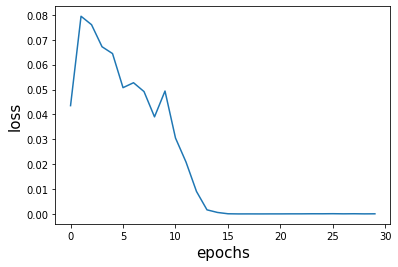

In [3]:
def standard_model(loader_xy, d, n_epochs=10, report_every=1, plot=True, weight_decay=0):
    # regular model
    net = MLP([d, 100, 100, 100, 100, 1])
    
    # train
    # opt = optim.SGD(net.parameters(), lr=0.1, weight_decay=weight_decay)
    opt = optim.Adam(net.parameters(), weight_decay=weight_decay)
    log = train(net, loader_xy, opt, n_epochs=n_epochs, report_every=report_every,
                criterion=nn.MSELoss())
    if plot: plot_log(log)
    return net

n_epochs = 30
STD = standard_model(loader_xy, 1, n_epochs=n_epochs, report_every=max(n_epochs//10,1), weight_decay=wd)

In [4]:
n_range = 30
x_range = torch.linspace(-0.4, 1.4, n_range).unsqueeze(1)
loader_arange = DataLoader(TensorDataset(x_range, torch.arange(n_range)), batch_size=bs, shuffle=False)
o = get_output(STD, loader_arange)

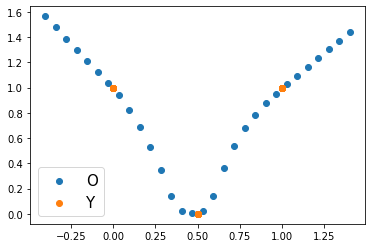

In [5]:
plt.scatter(x_range.numpy(), o, label='O')
plt.scatter(X.numpy(), Y.numpy(), label='Y')
plt.legend(fontsize=15)